# Understanding Over & Underfitting
## Predicting California Housing Prices

## Getting Started
In this project, you will use the California Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of California.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MedHouseVal'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [4]:
# Your code here
import pandas as pd

houses = pd.read_csv("housing.csv")

# Display basic information about the dataset
print(houses.head())  # Display the first few rows
print(houses.info())  # Display information about columns and data types

# Check for missing values
print(houses.isnull().sum())  # Show the count of missing values in each column

# Remove outliers (you can define your own criteria for outliers)
# For example, using z-score to remove outliers in numerical columns:
from scipy import stats
z_scores = stats.zscore(houses.select_dtypes(include='number'))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = houses[filtered_entries]

# Impute or remove missing values
# Depending on the nature of missing data, you might choose different strategies like imputation or removal
# For example, to drop rows with any missing values:
data = data.dropna()

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in California, and create plots that show the data dispersion as well as the regression line of best fit.

/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

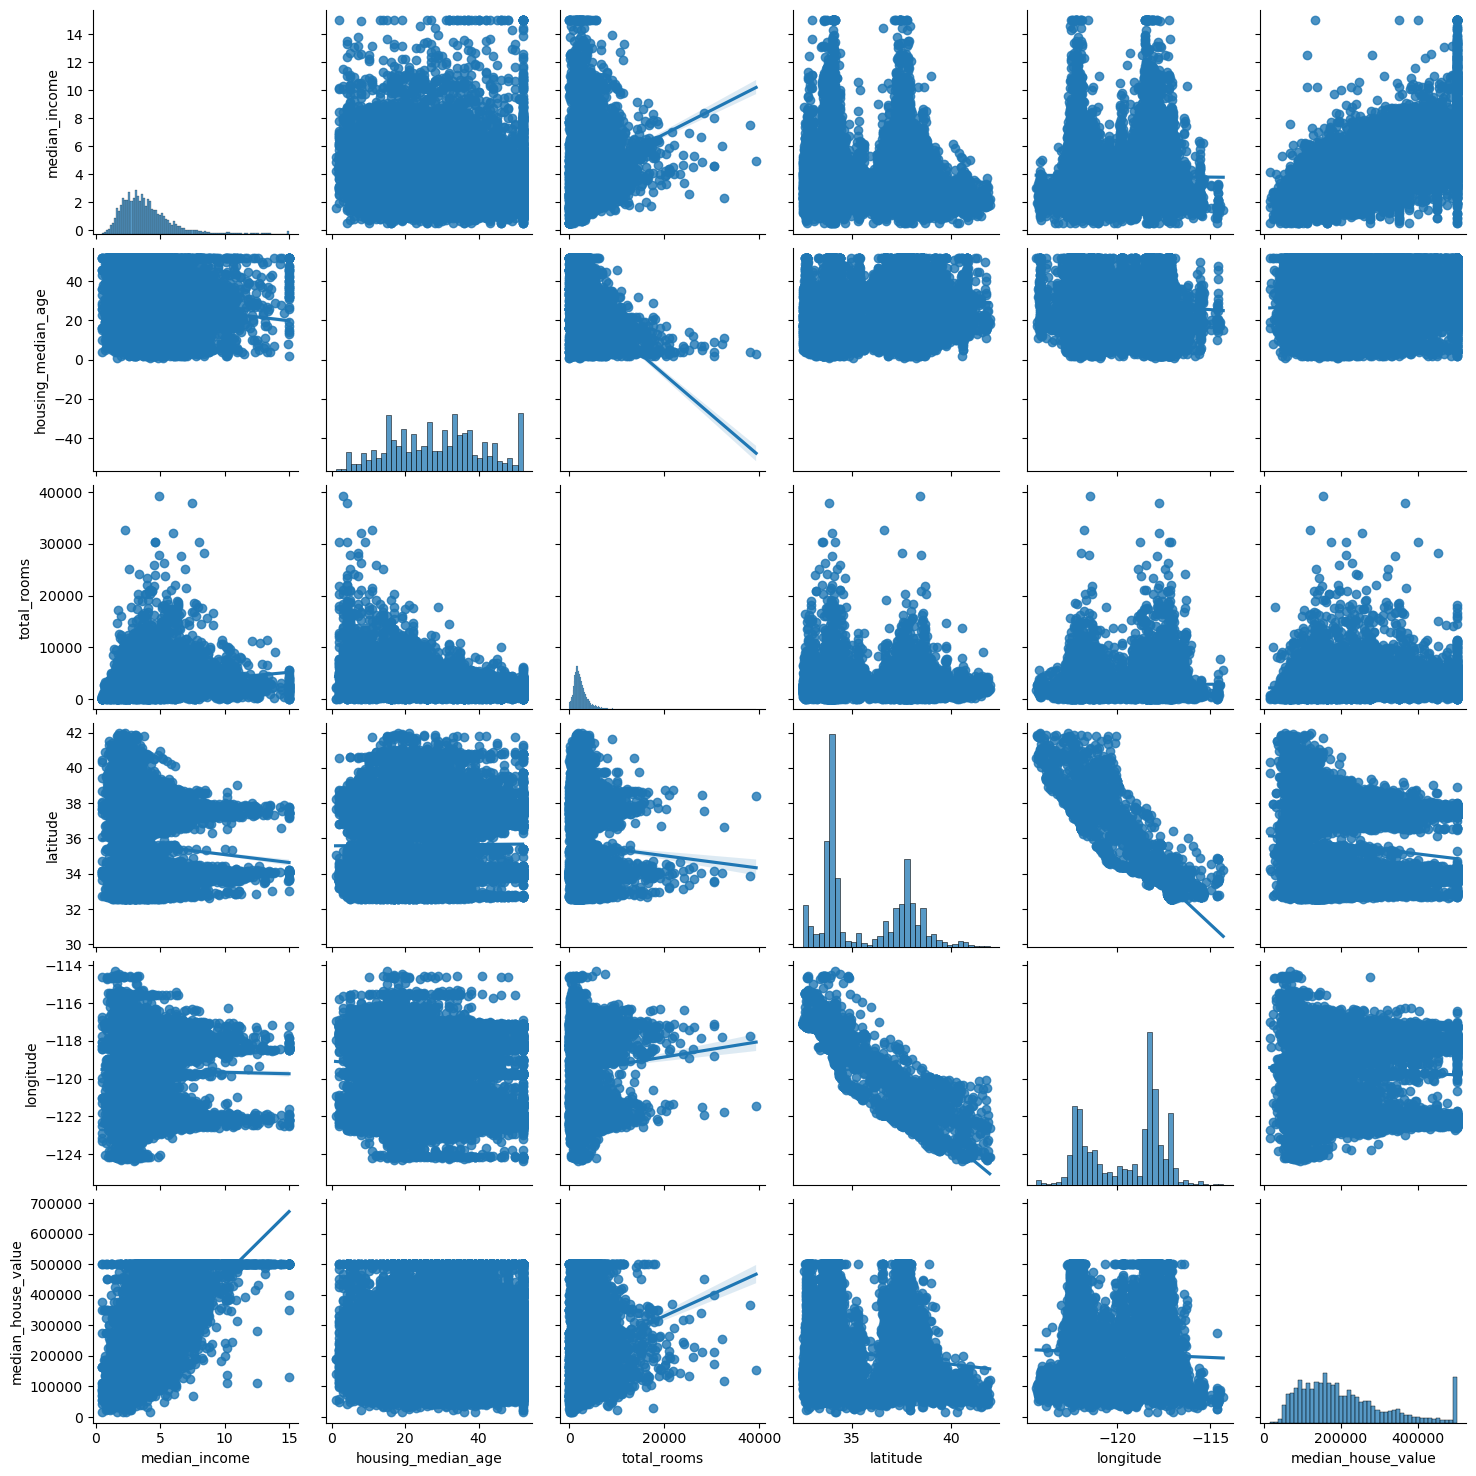

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting variables of interest
selected_vars = ['median_income', 'housing_median_age', 'total_rooms', 'latitude', 'longitude', 'median_house_value']
data_subset = houses[selected_vars]  # Replace 'your_data' with your DataFrame name

# Pairplot for scatter plots and regression lines
sns.pairplot(data_subset, kind='reg')
plt.show()


### What do these plots tell you about the relationships between these variables and the prices of homes in California? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
"""
Housing Median Age vs. Median House Value:
The relationship here seems less clear. The regression line might show a slight trend, but the data points are more scattered, suggesting that housing median age alone might not be a strong predictor of home prices.
Total Rooms vs. Median House Value:
Again, the relationship is not very definitive. The regression line might show a slight positive trend, but the data points are widely spread.
Median Income vs. Median House Value:
There appears to be a positive correlation between median income and median house value. 
"""

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

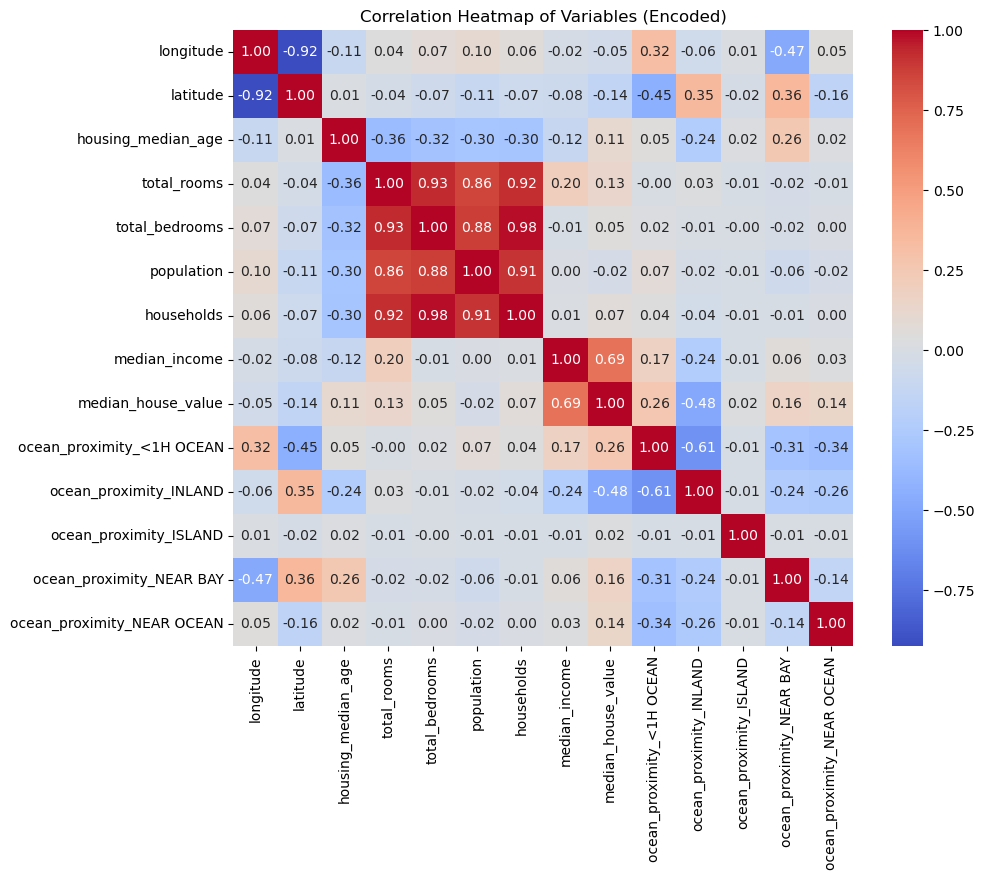

In [9]:
# Your response here
data_encoded = pd.get_dummies(houses)  # Replace 'your_data' with your DataFrame name
corr_matrix = data_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Variables (Encoded)')
plt.show()

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [12]:
# Your code here
print(houses['median_house_value'].describe())


count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

def performance_metric(y_true, y_pred):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [14]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = houses.drop(columns=['median_house_value'])  # Features
y = houses['median_house_value']  # Target variable

# Split the data into training and testing sets with shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the data is shuffled and split into X_train, X_test, y_train, y_test


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [23]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Drop rows with NaN values from your dataset
houses = houses.dropna()

X = houses.drop(columns=['median_house_value'])
y = houses['median_house_value']

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_encoded_cleaned = pd.get_dummies(X_train_cleaned)
X_test_encoded_cleaned = pd.get_dummies(X_test_cleaned)

max_depth_values = [2, 4, 6, 8, 10]
train_scores_cleaned = []
test_scores_cleaned = []

for depth in max_depth_values:
    model = RandomForestRegressor(max_depth=depth, random_state=42)
    model.fit(X_train_encoded_cleaned, y_train_cleaned)
    train_score_cleaned = model.score(X_train_encoded_cleaned, y_train_cleaned)
    test_score_cleaned = model.score(X_test_encoded_cleaned, y_test_cleaned)
    train_scores_cleaned.append(train_score_cleaned)
    test_scores_cleaned.append(test_score_cleaned)

/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

Now, plot the score for each tree on the training set and on the testing set.

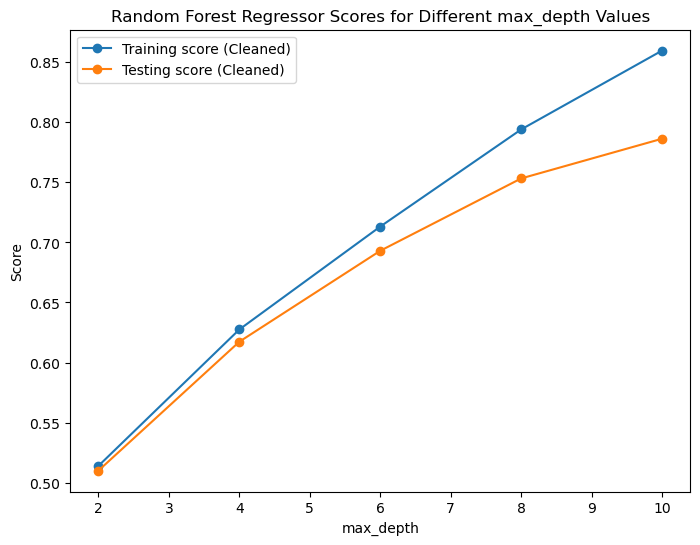

In [24]:
# Produce a plot with the score for the testing and training for the different max depths

plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, train_scores_cleaned, label='Training score (Cleaned)', marker='o')
plt.plot(max_depth_values, test_scores_cleaned, label='Testing score (Cleaned)', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Random Forest Regressor Scores for Different max_depth Values')
plt.legend()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
"""
Initially, as the max_depth increases, the model's performance on the training data improves. 
However, at very high depths, the training score may continue to improve or plateau, indicating that the model might be overfitting the training data.
"""

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Your response here
"""
A shallow tree (max_depth=1) tends to oversimplify the underlying patterns in the data. It can't capture intricate relationships between features and the target variable, leading to high bias.
Deeper trees (max_depth=10) capture more complex relationships in the training data. They tend to fit the training data closely and might capture noise and outliers, leading to high sensitivity to variations in the training data.
"""

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Assuming you've cleaned your dataset and applied encoding (X_train_encoded_cleaned, X_test_encoded_cleaned, y_train_cleaned, y_test_cleaned)

# Ensure consistency after cleaning
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_test_cleaned, y_train_cleaned, test_size=0.2, random_state=42
)

# Define the parameter grid for max_depth values to explore
param_grid = {'max_depth': [2, 4, 6, 8, 10]}

# Create the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to find the best max_depth
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Get the best max_depth
best_max_depth = grid_search.best_params_['max_depth']

# Train the model using the best max_depth on the full training data
best_model = RandomForestRegressor(max_depth=best_max_depth, random_state=42)
best_model.fit(X_train_cleaned, y_train_cleaned)

# Evaluate the performance of the best model on the testing set
test_score = best_model.score(X_test_cleaned, y_test_cleaned)

print(f"Best max_depth: {best_max_depth}")
print(f"Testing R² score: {test_score}")


ValueError: Found input variables with inconsistent numbers of samples: [4087, 16346]

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1990?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like California be applicable in a rural city?*

In [ ]:
# Your response here